## ECG Classification with Extended Metrics (Safe JSON Version)

In [1]:
!pip install torch torchvision torchaudio scikit-learn pandas seaborn matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
train_df = pd.read_csv('ECG_train_preprocessed.csv')
test_df = pd.read_csv('ECG_test_preprocessed.csv')
X_train = train_df.drop(columns=['condition']).astype('float32')
X_test = test_df.drop(columns=['condition']).astype('float32')
le = LabelEncoder()
y_train = le.fit_transform(train_df['condition'])
y_test = le.transform(test_df['condition'])
labels = le.classes_.tolist()

In [4]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results = []

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    results.append({'Model': model_name, 'Accuracy': acc, 'F1 (Macro)': f1_macro, 'F1 (Weighted)': f1_weighted, 'RMSE': rmse, 'MAE': mae})

    print('\n📊', model_name, 'Metrics:')
    print('✅ Accuracy:', round(acc, 4))
    print('🎯 F1 Macro:', round(f1_macro, 4))
    print('🎯 F1 Weighted:', round(f1_weighted, 4))
    print('📉 RMSE:', round(rmse, 4))
    print('📉 MAE:', round(mae, 4))
    print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=labels))
    plot_conf_matrix(y_true, y_pred, model_name)

c:\Users\Hajel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



📊 Logistic Regression Metrics:
✅ Accuracy: 0.7719
🎯 F1 Macro: 0.6813
🎯 F1 Weighted: 0.7815
📉 RMSE: 0.5874
📉 MAE: 0.2671

Classification Report:
                        precision    recall  f1-score   support

                  CAD       0.43      0.67      0.53       223
Myocardial Infarction       0.63      0.67      0.65       704
               Normal       0.91      0.83      0.87      1739

             accuracy                           0.77      2666
            macro avg       0.66      0.72      0.68      2666
         weighted avg       0.80      0.77      0.78      2666



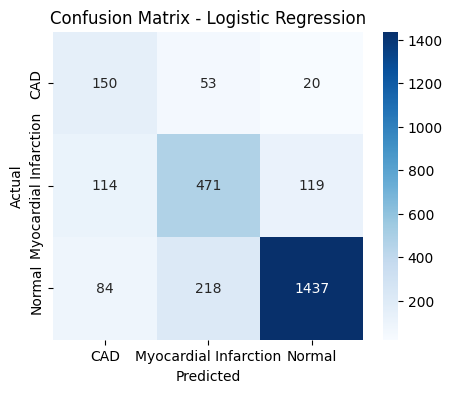

In [5]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model(y_test, lr.predict(X_test), 'Logistic Regression')


📊 KNN Metrics:
✅ Accuracy: 0.6309
🎯 F1 Macro: 0.5818
🎯 F1 Weighted: 0.6531
📉 RMSE: 0.7471
📉 MAE: 0.4321

Classification Report:
                        precision    recall  f1-score   support

                  CAD       0.36      0.73      0.49       223
Myocardial Infarction       0.45      0.68      0.54       704
               Normal       0.90      0.60      0.72      1739

             accuracy                           0.63      2666
            macro avg       0.57      0.67      0.58      2666
         weighted avg       0.74      0.63      0.65      2666



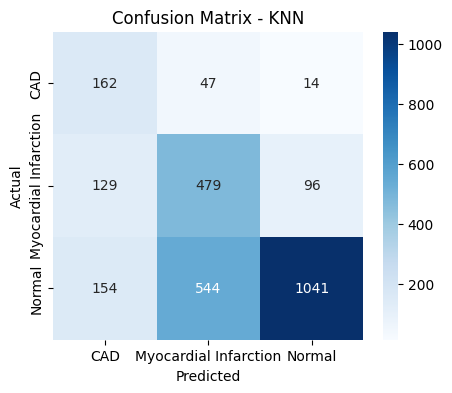

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(y_test, knn.predict(X_test), 'KNN')


📊 Random Forest Metrics:
✅ Accuracy: 0.8305
🎯 F1 Macro: 0.7393
🎯 F1 Weighted: 0.826
📉 RMSE: 0.4822
📉 MAE: 0.1905

Classification Report:
                        precision    recall  f1-score   support

                  CAD       0.69      0.55      0.61       223
Myocardial Infarction       0.74      0.68      0.71       704
               Normal       0.88      0.93      0.90      1739

             accuracy                           0.83      2666
            macro avg       0.77      0.72      0.74      2666
         weighted avg       0.82      0.83      0.83      2666



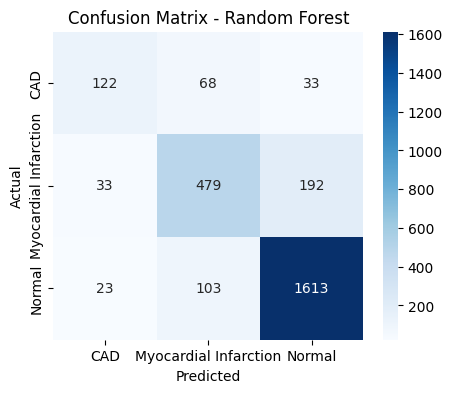

In [7]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(y_test, rf.predict(X_test), 'Random Forest')


📊 SVM (CPU) Metrics:
✅ Accuracy: 0.7581
🎯 F1 Macro: 0.6125
🎯 F1 Weighted: 0.7331
📉 RMSE: 0.6231
📉 MAE: 0.2907

Classification Report:
                        precision    recall  f1-score   support

                  CAD       0.71      0.33      0.45       223
Myocardial Infarction       0.72      0.43      0.54       704
               Normal       0.77      0.94      0.85      1739

             accuracy                           0.76      2666
            macro avg       0.73      0.57      0.61      2666
         weighted avg       0.75      0.76      0.73      2666



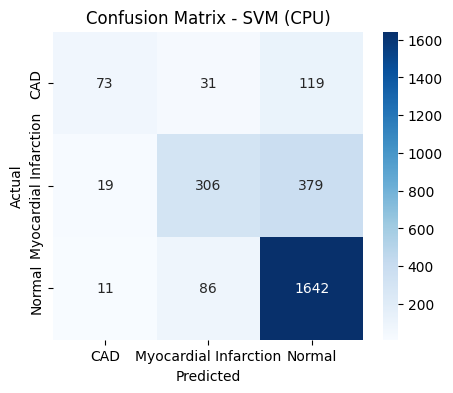

In [8]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
evaluate_model(y_test, svm_rbf.predict(X_test), 'SVM (CPU)')

Epoch 10/50 - Loss: 0.0652
Epoch 20/50 - Loss: 0.0006
Epoch 30/50 - Loss: 0.0035
Epoch 40/50 - Loss: 0.0003
Epoch 50/50 - Loss: 0.0

📊 MLP (PyTorch GPU) Metrics:
✅ Accuracy: 0.8083
🎯 F1 Macro: 0.7001
🎯 F1 Weighted: 0.8022
📉 RMSE: 0.5113
📉 MAE: 0.2149

Classification Report:
                        precision    recall  f1-score   support

                  CAD       0.65      0.47      0.54       223
Myocardial Infarction       0.70      0.64      0.67       704
               Normal       0.86      0.92      0.89      1739

             accuracy                           0.81      2666
            macro avg       0.73      0.68      0.70      2666
         weighted avg       0.80      0.81      0.80      2666



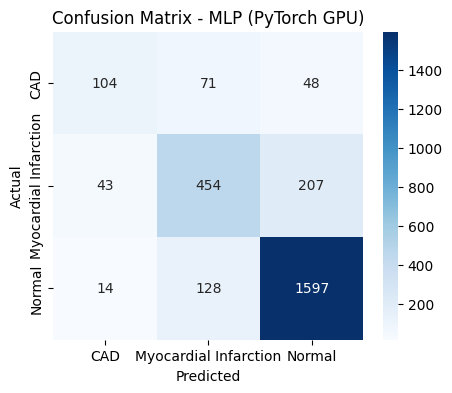

In [9]:
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_torch = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32).to(device)

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=100, output_dim=len(labels)):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(input_dim, hidden_dim), nn.ReLU(), nn.Linear(hidden_dim, output_dim))
    def forward(self, x): return self.layers(x)

mlp_model = MLP(X_train.shape[1], 100, len(labels)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
dataset = TensorDataset(X_train_torch, y_train_torch)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for epoch in range(50):
    mlp_model.train()
    for xb, yb in loader:
        optimizer.zero_grad(); out = mlp_model(xb); loss = criterion(out, yb); loss.backward(); optimizer.step()
    if (epoch+1) % 10 == 0: print(f'Epoch {epoch+1}/50 - Loss:', round(loss.item(), 4))

mlp_model.eval()
with torch.no_grad():
    preds = mlp_model(X_test_torch).argmax(dim=1).cpu().numpy()
    evaluate_model(y_test, preds, 'MLP (PyTorch GPU)')

📂 Detailed results saved to win_gpu_model_detailed_metrics.csv


C:\Users\Hajel\AppData\Local\Temp\ipykernel_21216\3346835112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


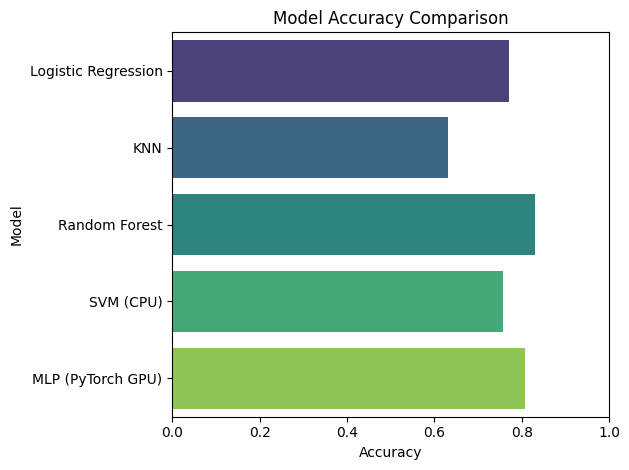

In [10]:
results_df = pd.DataFrame(results)
results_df.to_csv('win_gpu_model_detailed_metrics.csv', index=False)
print('📂 Detailed results saved to win_gpu_model_detailed_metrics.csv')
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0,1); plt.tight_layout(); plt.show()